[link text](https://)# Mental Health in Tech Survey

# Introduction
**This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.**


> Table content the dataset


| S.No | Attribute                         | Description                |
|------|-----------------------------------|----------------------------|
| 1    | timestamp                         | Timestamp                  |
| 2    | age                               | Age                        |
| 3    | gender                            | Gender                     |
| 4    | country                           | Country                    |
| 5    | state                             | If you live in the United States, which state or territory do you live in?                      |
| 6    | self_employed                     | Are you self-employed?             |
| 7    | family_history                    | Do you have a family history of mental illness? |
| 8    | treatment                         | Have you sought treatment for a mental health condition?           |
| 9    | work_interfere                    | If you have a mental health condition, do you feel that it interferes with your work?          |
| 10   | no_employees                      | How many employees does your company or organization have?        |
| 11   | remote_work                       | Do you work remotely (outside of an office) at least 50% of the time?                |
| 12   | tech_company                      | Is your employer primarily a tech company/organization? |
| 13   | benefits                          | Does your employer provide mental health benefits?     |
| 14   | care_options                      | Do you know the options for mental health care your employer provides?  |
| 15   | wellness_program                  | Has your employer ever discussed mental health as part of an employee wellness program? |
| 16   | seek_help                         | RDoes your employer provide resources to learn more about mental health issues and how to seek help? |
| 17   | anonymity                         | Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?       |
| 18   | leave                             | How easy is it for you to take medical leave for a mental health condition?      |
| 19   | mental_health_consequence         | Do you think that discussing a mental health issue with your employer would have negative consequences? |
| 20   | phys_health_consequence           | Do you think that discussing a physical health issue with your employer would have negative consequences? |
| 21   | coworkers                         | Would you be willing to discuss a mental health issue with your coworkers ? |
| 22   | supervisor                        | Would you be willing to discuss a mental health issue with your direct supervisor(s)? |
| 23   | mental_health_interview           | Would you bring up a mental health issue with a potential employer in an interview? |
| 24   | phys_health_interview             | Would you bring up a physical health issue with a potential employer in an interview? |
| 25   | mental_vs_physical                | Do you feel that your employer takes mental health as seriously as physical health? |
| 26   | obs_consequence                   | Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace? |
| 27   | comments                          | Any additional notes or comments?       |



---



> Classification (target)

**The target is treatment column**










In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

#**TASK 1:**


1.   Describe the data **(features and samples)** and compute the basic statistics of given
data **(mean, median, and std)**



2.   Exploratory Data Analysis (EDA)



In [ ]:
path="/content/survey.csv"

In [ ]:
df = pd.read_csv(path)
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [ ]:
info=df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
df.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [ ]:
ds=df.describe()
ds

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [ ]:
df.shape

(1259, 27)

# Calculate the (mean,median,std)


In [ ]:
mean=df.mean()
mean

<ipython-input-22-3c921447f82d>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean=df.mean()


Age    7.942815e+07
dtype: float64

**The output only calculate one column(Age) becuse only this numerical**

In [ ]:
median=df.median()
median

<ipython-input-23-039655f9d482>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median=df.median()


Age    31.0
dtype: float64

**The output only calculate one column(Age) becuse only this numerical**

In [ ]:
std=df.std()
std

<ipython-input-24-75afb33a3643>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std=df.std()


Age    2.818299e+09
dtype: float64

**The output only calculate one column(Age) becuse only this numerical**

standard deviation is  used to quantify the uncertainty or variability in a dataset. in a dataset of heights, a high standard deviation would indicate a wide variety of heights, while a low standard deviation would suggest that most people have a height close to the average

# Task 2:Data Preprocessing


1.   A. Handling Missing Values by Basic Methods.

2.   Use the Normalization technique




In [ ]:
Df=df.copy()

# Handling Missing Values and Cleaning

In [ ]:
Df['Timestamp'] = pd.to_datetime(Df['Timestamp'])

In [ ]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  1259 non-null   datetime64[ns]
 1   Age                        1259 non-null   int64         
 2   Gender                     1259 non-null   object        
 3   Country                    1259 non-null   object        
 4   state                      744 non-null    object        
 5   self_employed              1241 non-null   object        
 6   family_history             1259 non-null   object        
 7   treatment                  1259 non-null   object        
 8   work_interfere             995 non-null    object        
 9   no_employees               1259 non-null   object        
 10  remote_work                1259 non-null   object        
 11  tech_company               1259 non-null   object        
 12  benefi

In [ ]:
print(Df.iloc[0,0])

2014-08-27 11:29:31


In [ ]:
Df=Df.dropna()
print('Aftter handling mesing value',Df.shape)

Aftter handling mesing value (86, 27)


In [ ]:
Df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
24,2014-08-27 11:36:48,33,male,United States,CA,No,Yes,Yes,Rarely,26-100,...,Don't know,No,No,Yes,Yes,No,Yes,Don't know,No,Relatively new job. Ask again later
25,2014-08-27 11:37:08,35,male,United States,TN,No,Yes,Yes,Sometimes,More than 1000,...,Very easy,Yes,No,Some of them,Yes,No,Yes,No,No,Sometimes I think about using drugs for my me...
33,2014-08-27 11:39:36,42,Male,United States,WA,No,Yes,Yes,Sometimes,26-100,...,Very easy,Maybe,No,Some of them,Some of them,Maybe,Yes,Don't know,No,I selected my current employer based on its po...
45,2014-08-27 11:43:36,38,Female,United States,TX,No,Yes,Yes,Sometimes,26-100,...,Somewhat easy,No,No,Some of them,Yes,No,No,Yes,No,Our health plan has covered my psychotherapy a...
49,2014-08-27 11:44:43,30,male,United States,IL,No,Yes,Yes,Rarely,26-100,...,Don't know,Maybe,No,Some of them,Yes,No,No,Don't know,No,I just started a new job last week hence a lot...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,2014-11-06 11:24:38,56,female,United States,OR,Yes,No,No,Rarely,1-5,...,Don't know,Maybe,Maybe,No,No,No,No,Don't know,No,I'm self-employed on contract with small start...
1190,2015-01-03 03:38:30,44,M,United States,OH,No,Yes,Yes,Sometimes,100-500,...,Don't know,Maybe,No,Some of them,Some of them,No,No,Don't know,No,My mental health issues were the direct result...
1219,2015-02-21 09:48:13,38,Male,United States,TX,No,No,Yes,Sometimes,More than 1000,...,Very easy,No,No,Yes,Yes,No,No,Don't know,No,I openly discuss my mental health struggles. I...
1221,2015-02-21 10:45:51,46,male,United States,MD,No,Yes,Yes,Sometimes,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Just starting a new job hence the numerous I d...


In [ ]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 24 to 1249
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  86 non-null     datetime64[ns]
 1   Age                        86 non-null     int64         
 2   Gender                     86 non-null     object        
 3   Country                    86 non-null     object        
 4   state                      86 non-null     object        
 5   self_employed              86 non-null     object        
 6   family_history             86 non-null     object        
 7   treatment                  86 non-null     object        
 8   work_interfere             86 non-null     object        
 9   no_employees               86 non-null     object        
 10  remote_work                86 non-null     object        
 11  tech_company               86 non-null     object        
 12  benefit

In [ ]:
Df.isna().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
dtype: int64

In [ ]:
gender = Df['Gender'].unique()
lwer_c=Df['Gender'] = Df['Gender'].str.lower()

Df["Gender"] = Df["Gender"].replace('m', 'male')
Df["Gender"] = Df["Gender"].replace('f', 'female')
Df["Gender"] = Df["Gender"].replace('woman', 'female')
Df["Gender"] = Df["Gender"].replace('female ', 'female')
Df["Gender"] = Df["Gender"].replace('cis-female/femme', 'female')
Df["Gender"] = Df["Gender"].replace('female (cis)', 'female')
Df["Gender"] = Df["Gender"].replace('cis male', 'male')
Df["Gender"] = Df["Gender"].replace('a little about you', 'male')
Df["Gender"] = Df["Gender"].replace('p', 'male')

print(f"after handling the {gender}")



after handling the ['male' 'Male' 'Female' 'M' 'F' 'female' 'woman' 'Female ' 'm'
 'cis-female/femme' 'f' 'Female (cis)' 'Cis Male' 'A little about you' 'p']


In [ ]:
ne = Df['no_employees'].unique()
ne
#the mean from 26 to 100 is 63
Df["no_employees"] = Df["no_employees"].replace('26-100',63 )
Df["no_employees"] = Df["no_employees"].replace('More than 1000',1000)
#the mean from 1 to 5 is 3
Df["no_employees"] = Df["no_employees"].replace('1-5',3)
#the mean from 6 to 25 is 15.5
Df["no_employees"] = Df["no_employees"].replace('6-25', 16)
#the mean from 500 to 1000 is 750
Df["no_employees"] = Df["no_employees"].replace('500-1000', 750)
#the mean from 100 to 500 is 300
Df["no_employees"] = Df["no_employees"].replace('100-500', 300)
#print(Df['no_employees'])
Df['no_employees'] = pd.to_numeric(Df['no_employees'])
print(Df['no_employees'])

24        63
25      1000
33        63
45        63
49        63
        ... 
1186       3
1190     300
1219    1000
1221     300
1249      63
Name: no_employees, Length: 86, dtype: int64


In [ ]:
m=Df["mental_health_consequence"].unique()
m
Df["mental_health_consequence"] = Df["mental_health_consequence"].replace('Maybe','Yes' )


In [ ]:
convert=Df['treatment'].unique()
convert
Df["treatment"] = Df["treatment"].replace('Yes',1 )
Df["treatment"] = Df["treatment"].replace('No',0 )
Df['treatment'] = pd.to_numeric(Df['treatment'])


In [ ]:
convert=Df['family_history'].unique()
convert
Df["family_history"] = Df["family_history"].replace('Yes',1 )
Df["family_history"] = Df["family_history"].replace('No',0 )
Df['family_history'] = pd.to_numeric(Df['family_history'])


In [ ]:
convert=Df['mental_health_consequence'].unique()
convert
Df["mental_health_consequence"] = Df["mental_health_consequence"].replace('Yes',1 )
Df["mental_health_consequence"] = Df["mental_health_consequence"].replace('No',0 )
Df['mental_health_consequence'] = pd.to_numeric(Df['mental_health_consequence'])

In [ ]:
Df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
24,2014-08-27 11:36:48,33,male,United States,CA,No,1,1,Rarely,63,...,Don't know,0,No,Yes,Yes,No,Yes,Don't know,No,Relatively new job. Ask again later
25,2014-08-27 11:37:08,35,male,United States,TN,No,1,1,Sometimes,1000,...,Very easy,1,No,Some of them,Yes,No,Yes,No,No,Sometimes I think about using drugs for my me...
33,2014-08-27 11:39:36,42,male,United States,WA,No,1,1,Sometimes,63,...,Very easy,1,No,Some of them,Some of them,Maybe,Yes,Don't know,No,I selected my current employer based on its po...
45,2014-08-27 11:43:36,38,female,United States,TX,No,1,1,Sometimes,63,...,Somewhat easy,0,No,Some of them,Yes,No,No,Yes,No,Our health plan has covered my psychotherapy a...
49,2014-08-27 11:44:43,30,male,United States,IL,No,1,1,Rarely,63,...,Don't know,1,No,Some of them,Yes,No,No,Don't know,No,I just started a new job last week hence a lot...


In [ ]:
mean=Df.mean()
print(mean)
median=Df.median()
print(median)
std=Df.std()
print(std)
print('----------------------------------------------------')
ds=Df.describe()
print(ds)

Age                           34.662791
family_history                 0.581395
treatment                      0.767442
no_employees                 337.174419
mental_health_consequence      0.604651
dtype: float64
Age                          35.0
family_history                1.0
treatment                     1.0
no_employees                 63.0
mental_health_consequence     1.0
dtype: float64
Timestamp                    46 days 08:58:38.559307611
Age                                             8.67669
family_history                                 0.496224
treatment                                      0.424941
no_employees                                 404.468284
mental_health_consequence                      0.491793
dtype: object
----------------------------------------------------
             Age  family_history  treatment  no_employees  \
count  86.000000       86.000000  86.000000     86.000000   
mean   34.662791        0.581395   0.767442    337.174419   
std     8.6766

<ipython-input-40-33a094a04e5c>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean=Df.mean()
<ipython-input-40-33a094a04e5c>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean=Df.mean()
<ipython-input-40-33a094a04e5c>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  median=Df.median()
<ipython-input-40-33a094a04e5c>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of n

In [ ]:
ds=Df.describe()
ds

,Age,family_history,treatment,no_employees,mental_health_consequence
count,86.000000,86.000000,86.000000,86.000000,86.000000
mean,34.662791,0.581395,0.767442,337.174419,0.604651
std,8.676690,0.496224,0.424941,404.468284,0.491793
min,-1.000000,0.000000,0.000000,3.000000,0.000000
25%,30.000000,0.000000,1.000000,16.000000,0.000000
50%,35.000000,1.000000,1.000000,63.000000,1.000000
75%,39.750000,1.000000,1.000000,750.000000,1.000000
max,56.000000,1.000000,1.000000,1000.000000,1.000000


# Visualize

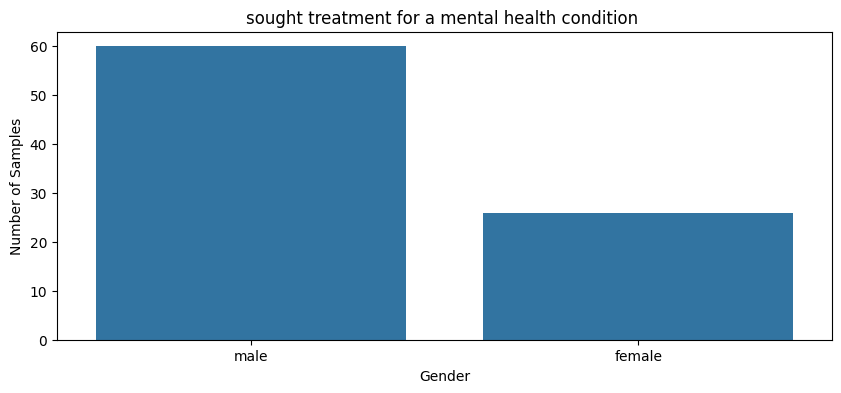

In [ ]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(x='Gender', data=Df)
plt.title('sought treatment for a mental health condition ')
plt.ylabel('Number of Samples');
plt.show()

<ipython-input-43-96b29d9491d5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='treatment', data=Df, palette=['red', 'green'])


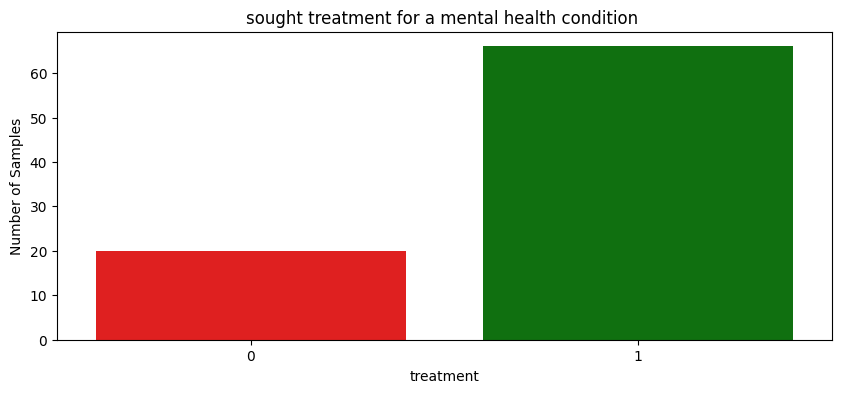

In [ ]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(x='treatment', data=Df, palette=['red', 'green'])
plt.title('sought treatment for a mental health condition ')
plt.ylabel('Number of Samples');
plt.show()

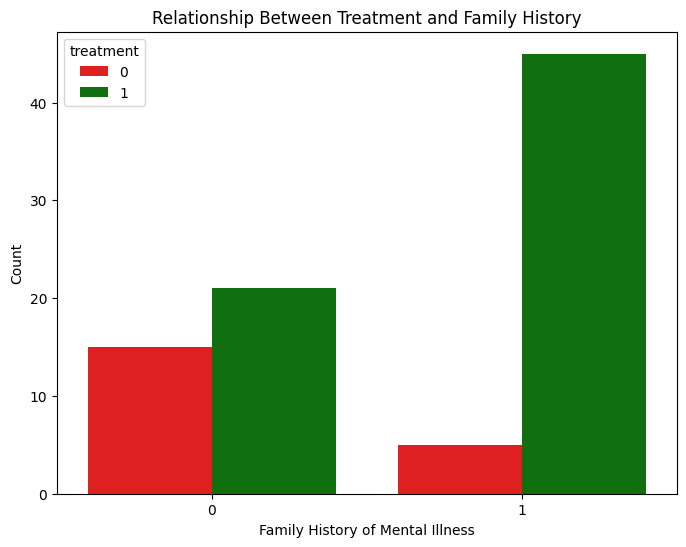

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='family_history', hue='treatment', data=Df,palette=['red', 'green'])
plt.title('Relationship Between Treatment and Family History')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Count')
plt.show()

# The tall red bar in the "Yes" group indicates a large number of individuals with a family history of mental illness have not sought treatment.
# The shorter green bar in the "Yes" group shows a smaller number of individuals with a family history of mental illness have sought treatment.
# In the "No" group, the red bar is taller than the green bar, indicating more individuals without a family history of mental illness have not sought treatment compared to those who have.
# From this, we can gather:

# A larger proportion of individuals with a family history of mental illness have not sought treatment compared to those who have.

# Similarly, among those without a family history of mental illness, more individuals have not sought treatment compared to those who have

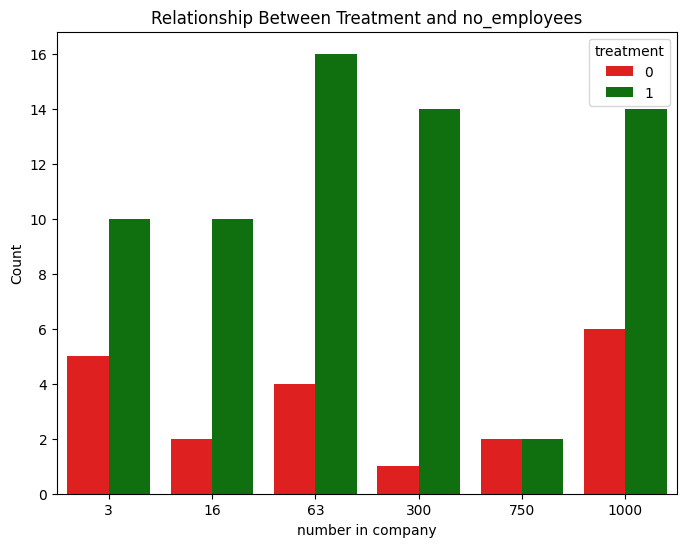

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='no_employees', hue='treatment', data=Df,palette=['red', 'green'])
plt.title('Relationship Between Treatment and no_employees')
plt.xlabel('number in company')
plt.ylabel('Count')
plt.show()

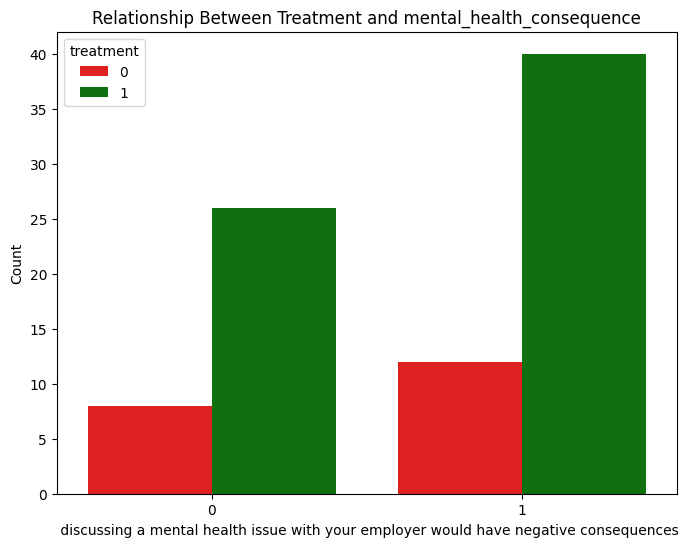

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='mental_health_consequence', hue='treatment', data=Df,palette=['red', 'green'])
plt.title('Relationship Between Treatment and mental_health_consequence')
plt.xlabel(' discussing a mental health issue with your employer would have negative consequences')
plt.ylabel('Count')
plt.show()

# Divide data into 70% for training and 30% for testing

| Term              | Brief Description                                |
|-------------------|--------------------------------------------------|
| family_history           | have a family history of mental illness or bo |
| no_employees         | How many employees does your company or organization have
| mental_health_consequence           | Do you think that discussing a mental health issue with your employer would have negative consequences?


In [ ]:
x=Df[['family_history','no_employees','mental_health_consequence']]  #clounm
y=Df['treatment']#target

x_trin,x_test,y_trin,y_test=train_test_split(x,y,test_size=0.3)

# Cheak if have imbalance or no




In [ ]:
balanceOR_NO = Df['treatment'].value_counts()
print(balanceOR_NO)


1    66
0    20
Name: treatment, dtype: int64


# oversampling

In [ ]:

!pip install imbalanced-learn

from imblearn.over_sampling import RandomOverSampler

X = Df.drop('treatment', axis=1)
y = Df['treatment']

ros = RandomOverSampler(sampling_strategy={0: 66})

X_res, y_res = ros.fit_resample(x, y)

balance_after = pd.Series(y_res).value_counts()
print(balance_after)

1    66
0    66
Name: treatment, dtype: int64


# Normalization

In [ ]:
from pickle import DEFAULT_PROTOCOL
# Min-Max Normalization
min_max = MinMaxScaler()
Df_min_max = pd.DataFrame(min_max.fit_transform(Df[['family_history', 'no_employees','mental_health_consequence']]), columns=['family_history', 'no_employees','mental_health_consequence'])

# Z-Score Normalization
z_score_scaler = StandardScaler()
Df_z_score = pd.DataFrame(z_score_scaler.fit_transform(Df[['family_history', 'no_employees','mental_health_consequence']]), columns=['family_history', 'no_employees','mental_health_consequence'])

# Decimal Scaling
Df_decimal= Df[['family_history', 'no_employees','mental_health_consequence']].apply(lambda x: x / (10 ** len(str(x.max()))))

# Print the normalized data
print("Min-Max Normalization:")
print(Df_min_max.head())

print("\nZ-Score Normalization:")
print(Df_z_score.head())

print("\nDecimal Scaling:")
print(Df_decimal.head())

Min-Max Normalization:
   family_history  no_employees  mental_health_consequence
0             1.0      0.060181                        0.0
1             1.0      1.000000                        1.0
2             1.0      0.060181                        1.0
3             1.0      0.060181                        0.0
4             1.0      0.060181                        1.0

Z-Score Normalization:
   family_history  no_employees  mental_health_consequence
0        0.848528     -0.681840                  -1.236694
1        0.848528      1.648369                   0.808608
2        0.848528     -0.681840                   0.808608
3        0.848528     -0.681840                  -1.236694
4        0.848528     -0.681840                   0.808608

Decimal Scaling:
    family_history  no_employees  mental_health_consequence
24             0.1        0.0063                        0.0
25             0.1        0.1000                        0.1
33             0.1        0.0063               

In [ ]:
Df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
24,2014-08-27 11:36:48,33,male,United States,CA,No,1,1,Rarely,63,...,Don't know,0,No,Yes,Yes,No,Yes,Don't know,No,Relatively new job. Ask again later
25,2014-08-27 11:37:08,35,male,United States,TN,No,1,1,Sometimes,1000,...,Very easy,1,No,Some of them,Yes,No,Yes,No,No,Sometimes I think about using drugs for my me...
33,2014-08-27 11:39:36,42,male,United States,WA,No,1,1,Sometimes,63,...,Very easy,1,No,Some of them,Some of them,Maybe,Yes,Don't know,No,I selected my current employer based on its po...
45,2014-08-27 11:43:36,38,female,United States,TX,No,1,1,Sometimes,63,...,Somewhat easy,0,No,Some of them,Yes,No,No,Yes,No,Our health plan has covered my psychotherapy a...
49,2014-08-27 11:44:43,30,male,United States,IL,No,1,1,Rarely,63,...,Don't know,1,No,Some of them,Yes,No,No,Don't know,No,I just started a new job last week hence a lot...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,2014-11-06 11:24:38,56,female,United States,OR,Yes,0,0,Rarely,3,...,Don't know,1,Maybe,No,No,No,No,Don't know,No,I'm self-employed on contract with small start...
1190,2015-01-03 03:38:30,44,male,United States,OH,No,1,1,Sometimes,300,...,Don't know,1,No,Some of them,Some of them,No,No,Don't know,No,My mental health issues were the direct result...
1219,2015-02-21 09:48:13,38,male,United States,TX,No,0,1,Sometimes,1000,...,Very easy,0,No,Yes,Yes,No,No,Don't know,No,I openly discuss my mental health struggles. I...
1221,2015-02-21 10:45:51,46,male,United States,MD,No,1,1,Sometimes,300,...,Don't know,0,No,Some of them,Yes,Yes,Yes,Don't know,No,Just starting a new job hence the numerous I d...


In [ ]:
display(x.head(10))

,family_history,no_employees,mental_health_consequence
24,1,63,0
25,1,1000,1
33,1,63,1
45,1,63,0
49,1,63,1
106,1,63,0
158,0,63,1
159,1,63,1
164,1,3,0
177,0,16,0


# Building Model

Select at least four classifiers to predict the class label.

 Divide data into 70% for training and 30% for testing.

 Calculate the accuracy of your model using accuracy and F1_score measures.

 Plot Confusion Matrix For the classes with labels.

 Visualize the Results






# A: Select at least four classifiers to predict the class label.


# **1:Random Forst**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(x , y)

y_pred=clf.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 3,  4],
       [ 2, 17]])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calculate F1 score
# Assuming it's a binary classification; if multi-class, add the average parameter
f1 = f1_score(y_test, y_pred, average='binary')  # or 'micro', 'macro', 'weighted' for multi-class
print(f'F1 Score: {f1}')


Accuracy: 0.7307692307692307
F1 Score: 0.8205128205128205


# 2. SVM classifier

In [ ]:

# Create an SVM classifier
clf = SVC()

# Train the model using the training sets
clf.fit(x, y)

# Make predictions on the test set
y_pred = clf.predict(x_test)

from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0,  7],
       [ 0, 19]])

In [ ]:
# Calculate accuracy score
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy2)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy Score: 0.7307692307692307
F1 Score: 0.8444444444444443


# 3.   Decision Tree Classifier

In [ ]:

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x,y)

y_pred=clf.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 3,  4],
       [ 3, 16]])

In [ ]:
# Calculate accuracy score
accuracy4 = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy4)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy Score: 0.7307692307692307
F1 Score: 0.8205128205128205


#  GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(x, y)
y_prednb= gnb.predict(x)


In [ ]:
# Calculate accuracy score
accuracy3 = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy3)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy Score: 0.7307692307692307
F1 Score: 0.8205128205128205


In [ ]:
# Define the classifiers
clf_rf = RandomForestClassifier(n_estimators=100)
clf_svm = SVC()
clf_dt = DecisionTreeClassifier()
clf_nb = GaussianNB()

# Fit the classifiers
clf_rf.fit(x_trin, y_trin)
clf_svm.fit(x_trin, y_trin)
clf_dt.fit(x_trin, y_trin)
clf_nb.fit(x_trin, y_trin)

# Predict using the classifiers
y_pred_rf = clf_rf.predict(x_test)
y_pred_svm = clf_svm.predict(x_test)
y_pred_dt = clf_dt.predict(x_test)
y_pred_nb = clf_nb.predict(x_test)

# Compute the confusion matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_nb = confusion_matrix(y_test, y_pred_nb)


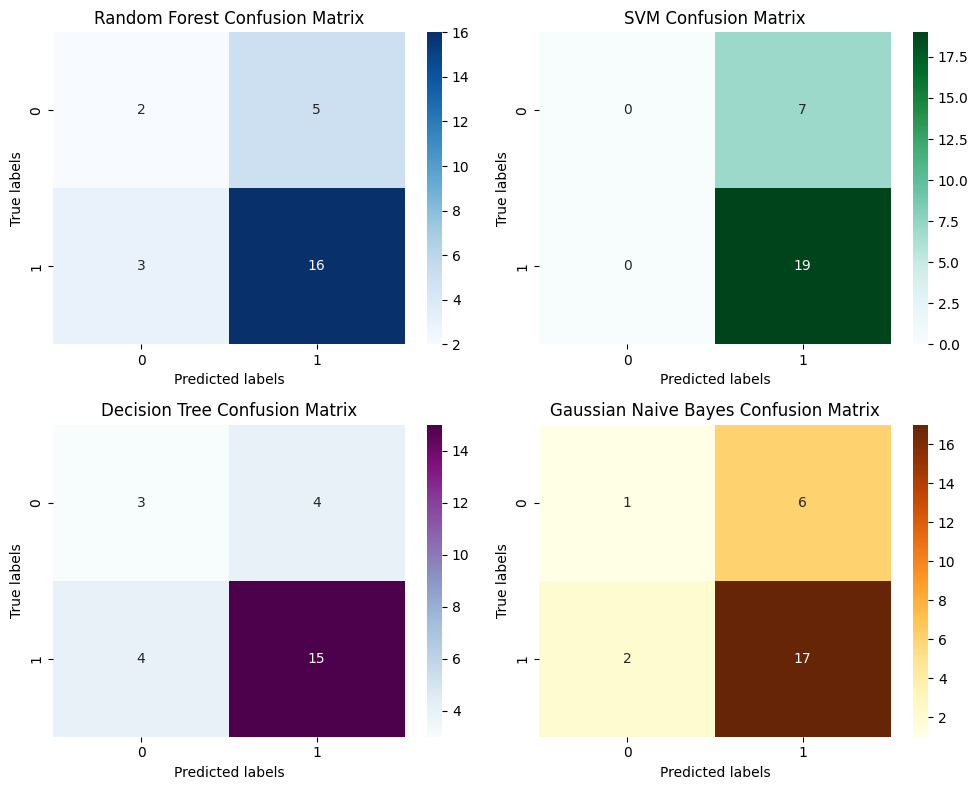

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# ... [Your model training and predictions here] ...

# Visualization of Confusion Matrices with different color maps
plt.figure(figsize=(10, 8))

# Random Forest Confusion Matrix
plt.subplot(2, 2, 1)
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt="d") # Change to Blues
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Random Forest Confusion Matrix")

# SVM Confusion Matrix
plt.subplot(2, 2, 2)
sns.heatmap(cm_svm, annot=True, cmap="BuGn", fmt="d") # Change to BuGn
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("SVM Confusion Matrix")

# Decision Tree Confusion Matrix
plt.subplot(2, 2, 3)
sns.heatmap(cm_dt, annot=True, cmap="BuPu", fmt="d") # Change to BuPu
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Decision Tree Confusion Matrix")

# Gaussian Naive Bayes Confusion Matrix
plt.subplot(2, 2, 4)
sns.heatmap(cm_nb, annot=True, cmap="YlOrBr", fmt="d") # Change to YlOrBr
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Gaussian Naive Bayes Confusion Matrix")

plt.tight_layout()
plt.show()


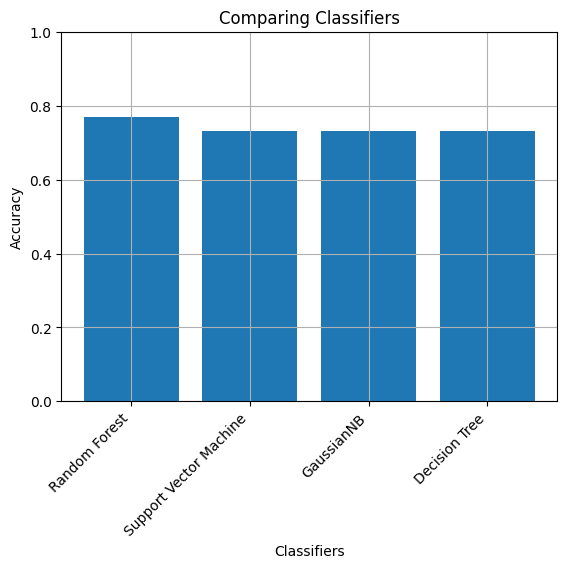

In [ ]:
import matplotlib.pyplot as plt

# Data for the classifiers
classifiers = ['Random Forest', 'Support Vector Machine', 'GaussianNB', 'Decision Tree']
accuracies = [accuracy, accuracy2, accuracy3, accuracy4]

# Custom colors for each classifier
# Here we change the colors to a different set
# colors = ['skyblue', 'orange', 'lightgreen', 'pink']  # New set of colors

# Create the bar chart
plt.bar(classifiers, accuracies)

# Customize the chart
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Comparing Classifiers")
plt.ylim(0, 1)  # Set the y-axis range to 0-1 for accuracy
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Add gridlines
plt.grid(True)

# Display the chart
plt.show()
